In [2]:
import os
os.chdir("..")  # Go to project root


In [2]:
from langgraph.graph import StateGraph, END
from langgraph_app.graph import ExpenseAgentState
from langgraph_app.nodes.rewrite_agent_node import rewrite_agent_node
from langgraph_app.nodes.retrieve_memory_node import retrieve_memory_node
from langgraph_app.nodes.tool_executor_node import tool_executor_node

# Build graph
graph = StateGraph(ExpenseAgentState)
graph.add_node("rewrite_query", rewrite_agent_node)
graph.add_node("retrieve_memory", retrieve_memory_node)
graph.add_node("execute_tool", tool_executor_node)

graph.set_entry_point("rewrite_query")
graph.add_edge("rewrite_query", "retrieve_memory")
graph.add_edge("retrieve_memory", "execute_tool")
graph.add_edge("execute_tool", END)

# Compile the graph
compiled = graph.compile()

# Use Graphviz for visualization (returns Digraph)
gv = compiled.get_graph()

# Render directly in Jupyter
from IPython.display import display
display(gv)


Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'rewrite_query': Node(id='rewrite_query', name='rewrite_query', data=RunnableLambda(rewrite_agent_node), metadata=None), 'retrieve_memory': Node(id='retrieve_memory', name='retrieve_memory', data=RunnableLambda(retrieve_memory_node), metadata=None), 'execute_tool': Node(id='execute_tool', name='execute_tool', data=RunnableLambda(tool_executor_node), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='rewrite_query', data=None, conditional=False), Edge(source='execute_tool', target='__end__', data=None, conditional=False), Edge(source='retrieve_memory', target='execute_tool', data=None, conditional=False), Edge(source='rewrite_query', target='retrieve_memory', data=None, conditional=False)])

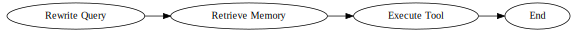

In [4]:
from langgraph.graph import StateGraph, END
from langgraph_app.graph import ExpenseAgentState
from langgraph_app.nodes.rewrite_agent_node import rewrite_agent_node
from langgraph_app.nodes.retrieve_memory_node import retrieve_memory_node
from langgraph_app.nodes.tool_executor_node import tool_executor_node

from graphviz import Digraph, Source  # ✅ CORRECT: Source from graphviz
from IPython.display import display   # ✅ display from IPython

# Step 1: Define graph manually
dot = Digraph(name="ExpenseGraph", format="svg")
dot.attr(rankdir="LR", size="8,5")

# Step 2: Add nodes
dot.node("rewrite_query", "📝 Rewrite Query")
dot.node("retrieve_memory", "🧠 Retrieve Memory")
dot.node("execute_tool", "🛠️ Execute Tool")
dot.node("__end__", "🏁 End")

# Step 3: Add edges
dot.edge("rewrite_query", "retrieve_memory")
dot.edge("retrieve_memory", "execute_tool")
dot.edge("execute_tool", "__end__")

# Step 4: Display inline in notebook
display(Source(dot.source))  # ✅ Now it will work


In [9]:
from langgraph.graph import StateGraph, END
from langgraph_app.graph import ExpenseAgentState
from langgraph_app.nodes.rewrite_agent_node import rewrite_agent_node
from langgraph_app.nodes.retrieve_memory_node import retrieve_memory_node
from langgraph_app.nodes.tool_executor_node import tool_executor_node

from graphviz import Digraph, Source
from IPython.display import display

# Step 1: Create the graph
dot = Digraph(name="ExpenseGraph", format="svg")
dot.attr(rankdir="LR", size="10,5")


# Step 2: Add nodes with tool metadata
dot.node("rewrite_query", "📝 Rewrite Query\nExtracts operation + arguments using LLM")
dot.node("retrieve_memory", "🧠 Retrieve Memory\nAdds context from past queries")
dot.node("execute_tool", "🛠️ Execute Tool\nInvokes: monthly, range, top, compare, summarize")
dot.node("__end__", "🏁 End\nFinal result returned")

# Step 3: Add edges
dot.edge("rewrite_query", "retrieve_memory", label="→ Structured query")
dot.edge("retrieve_memory", "execute_tool", label="→ Context-aware args")
dot.edge("execute_tool", "__end__", label="→ Result")

# Step 4: Display
display(Source(dot.source))


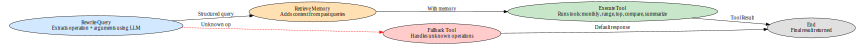

✅ Graph exported to:
📄 notebooks/expense_graph_viz.png
📄 notebooks/expense_graph_viz.pdf


In [11]:
from graphviz import Digraph, Source
from IPython.display import display

# Step 1: Create Graphviz diagram
dot = Digraph(name="ExpenseGraph", format="svg")
dot.attr(rankdir="LR", size="12,6")

# 🟦 Nodes
dot.node("rewrite_query", "📝 Rewrite Query\nExtracts operation + arguments using LLM", style="filled", fillcolor="#d1e8ff")
dot.node("retrieve_memory", "🧠 Retrieve Memory\nAdds context from past queries", style="filled", fillcolor="#ffe0b2")
dot.node("execute_tool", "🛠️ Execute Tool\nRuns tools: monthly, range, top, compare, summarize", style="filled", fillcolor="#c8e6c9")
dot.node("fallback_tool", "🚨 Fallback Tool\nHandles unknown operations", style="filled", fillcolor="#ffcccb")
dot.node("__end__", "🏁 End\nFinal result returned", style="filled", fillcolor="#e0e0e0")

# 🧭 Edges
dot.edge("rewrite_query", "retrieve_memory", label="✔ Structured query")
dot.edge("retrieve_memory", "execute_tool", label="✔ With memory")
dot.edge("execute_tool", "__end__", label="✔ Tool Result")
dot.edge("rewrite_query", "fallback_tool", label="❌ Unknown op", style="dashed", color="red")
dot.edge("fallback_tool", "__end__", label="✔ Default response")

# Step 2: Display inline in notebook (optional)
display(Source(dot.source))

# Step 3: Save to notebooks/ directory
output_path = "notebooks/expense_graph_viz"
dot.render(output_path, format="png", cleanup=True)
dot.render(output_path, format="pdf", cleanup=True)

print(f"✅ Graph exported to:\n📄 {output_path}.png\n📄 {output_path}.pdf")
